<a href="https://colab.research.google.com/github/hvmdvvn/Intro-to-Computer-Vision/blob/main/Lab_05_Reverse_A_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
video_path = '/content/14477006_2160_3840_30fps.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video file.")
    exit()

In [5]:
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Total frames in video:", frame_count)

Total frames in video: 250


In [6]:
frames = []
for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

cap.release()  # release the video

In [7]:
reversed_frames = frames[::-1]  # slices the list in reverse

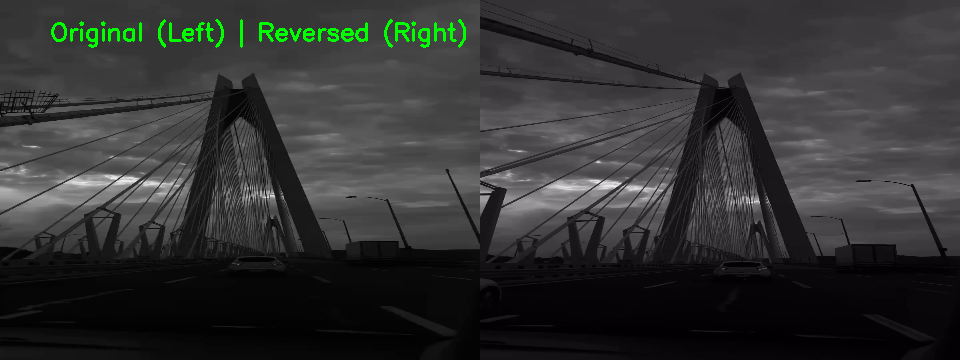

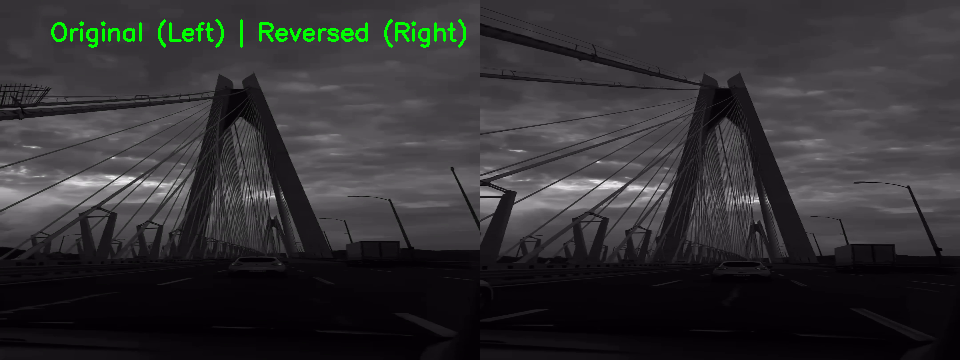

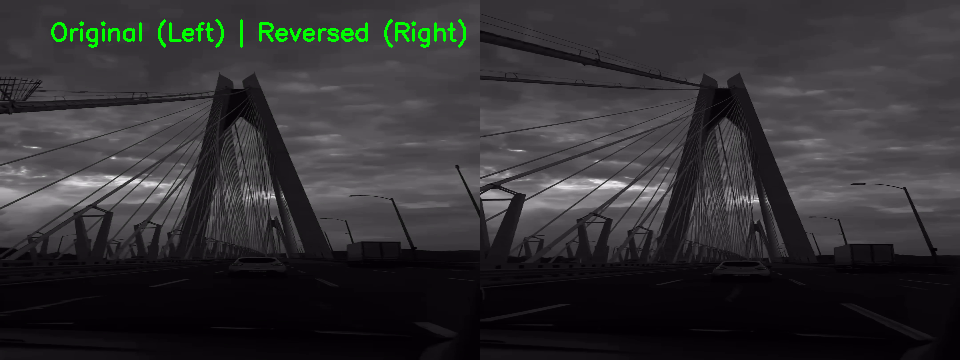

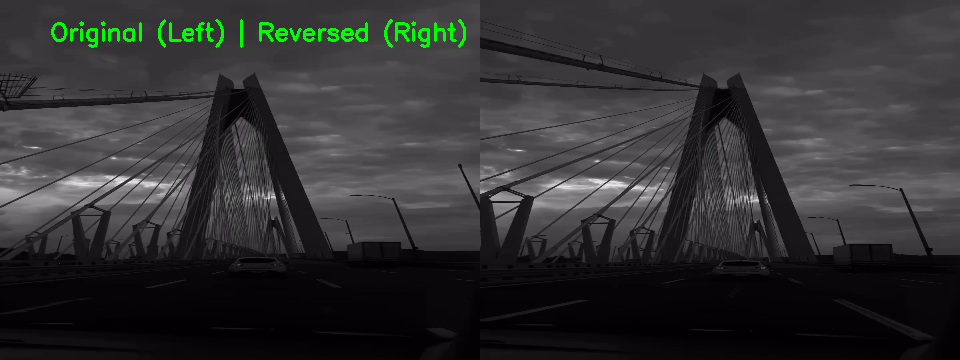

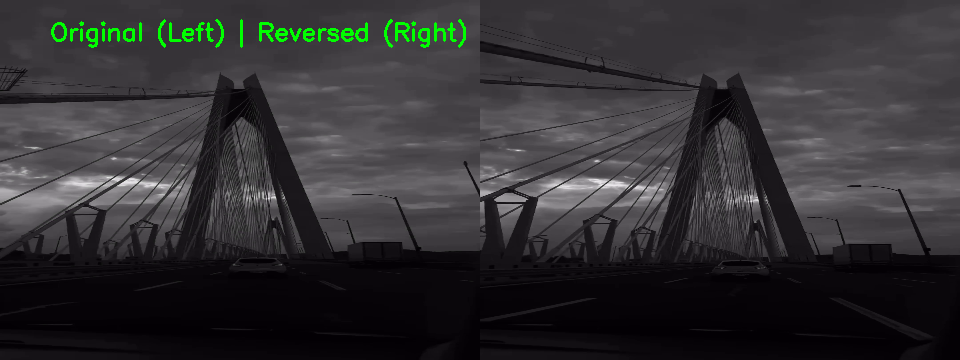

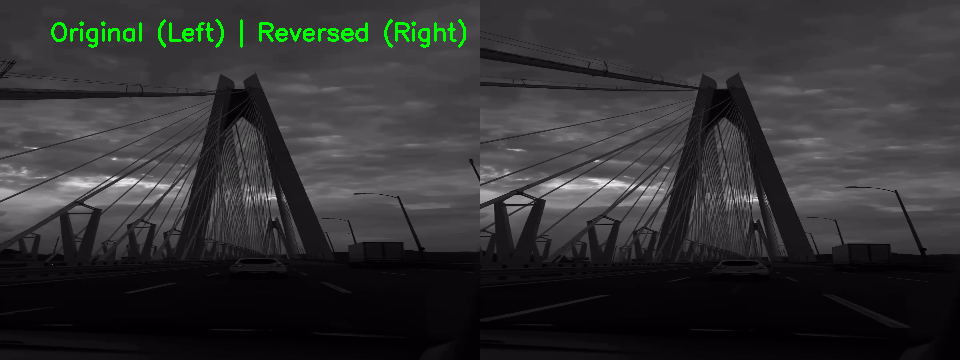

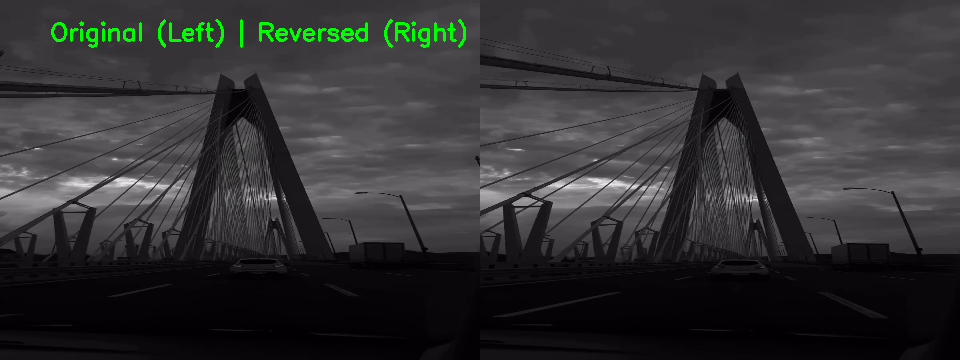

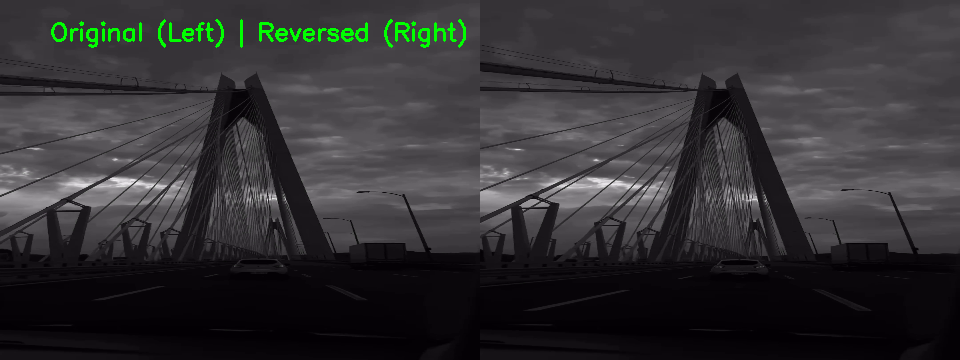

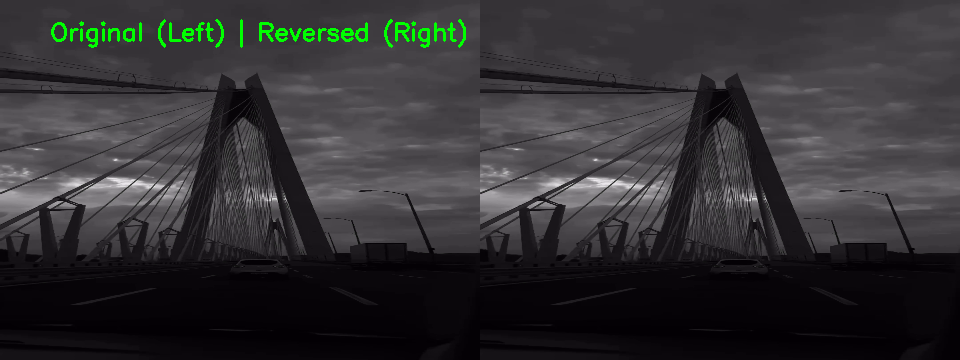

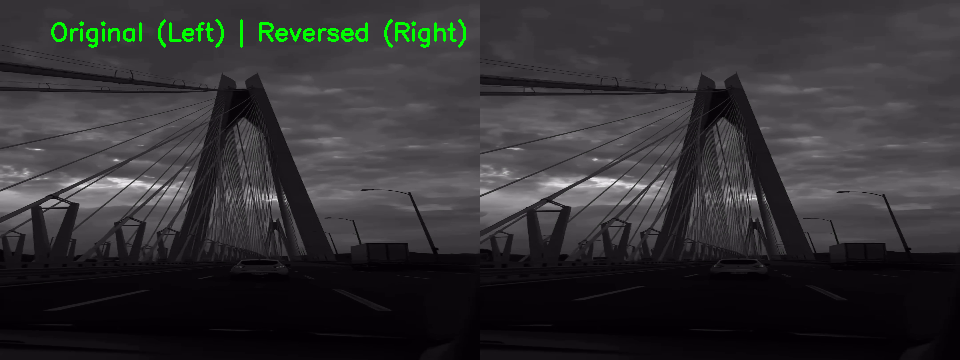

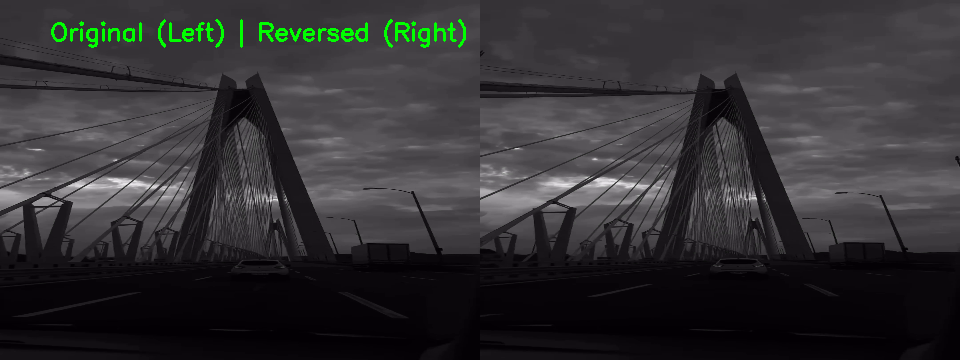

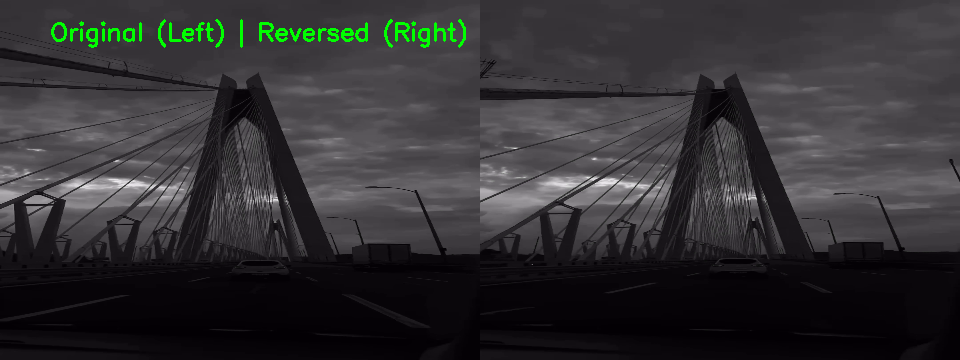

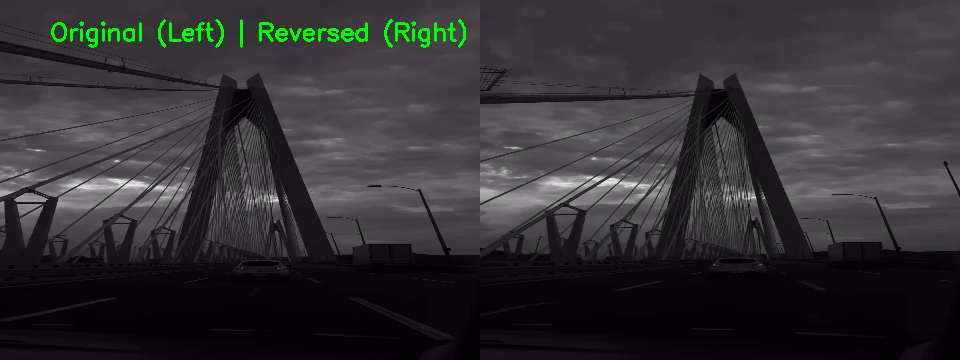

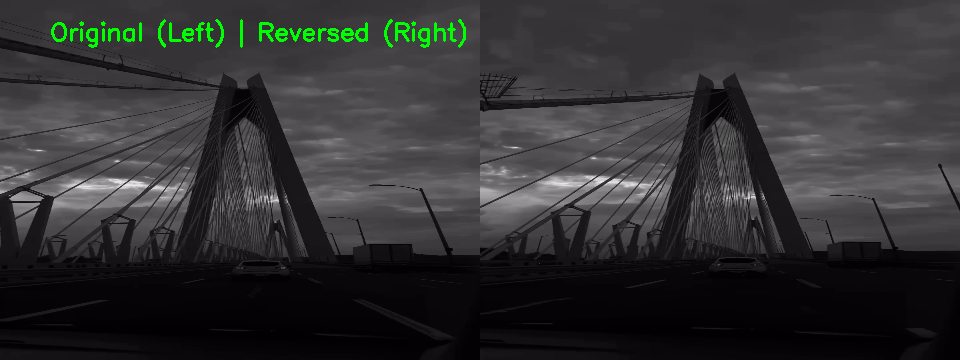

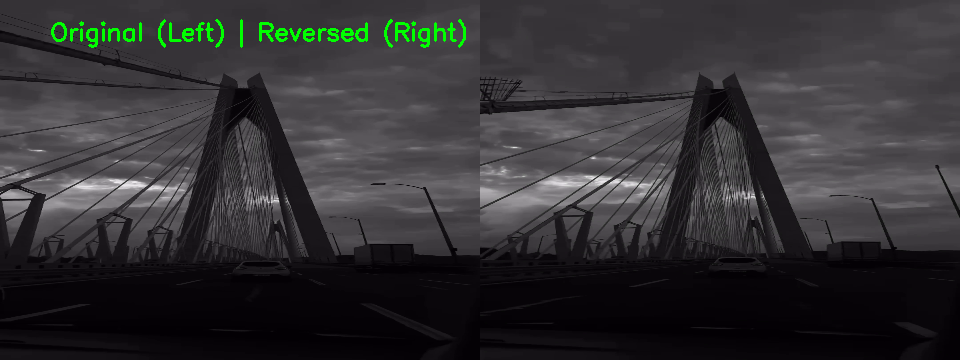

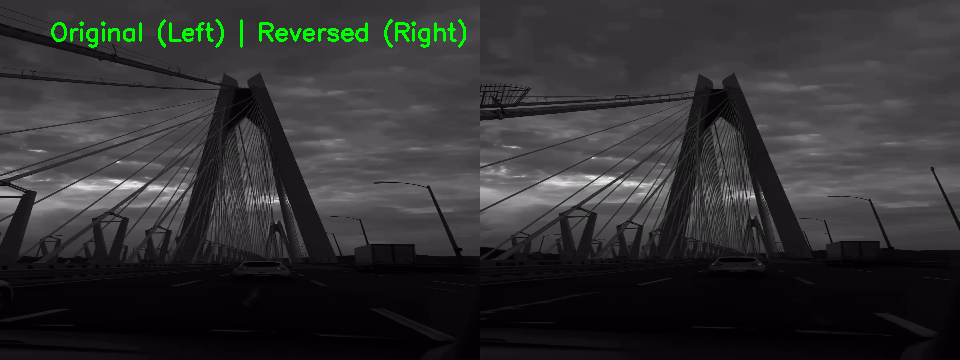

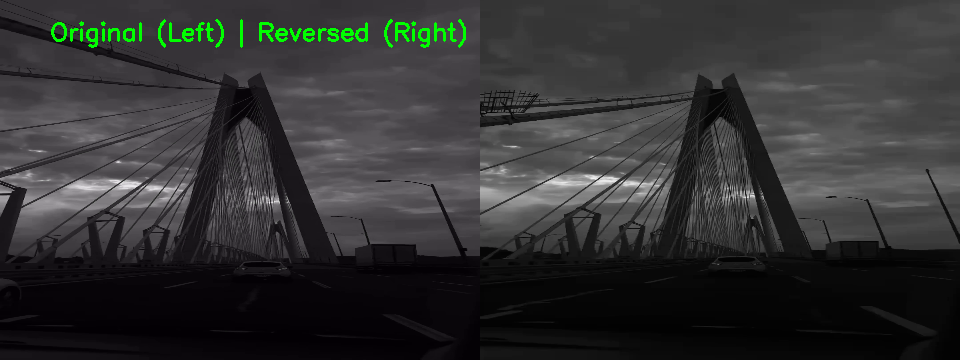

In [8]:
for orig_frame, rev_frame in zip(frames, reversed_frames):
    # Resize frames (optional, to make sure both same size)
    orig_frame = cv2.resize(orig_frame, (480, 360))
    rev_frame = cv2.resize(rev_frame, (480, 360))

    # Combine frames horizontally
    combined = np.hstack((orig_frame, rev_frame))

    # Add a label text on top
    cv2.putText(combined, "Original (Left) | Reversed (Right)",
                (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

    # Display combined video
    cv2_imshow(combined)

    # Wait for 25ms or until 'q' key pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [9]:
height, width, _ = frames[0].shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('reversed_output.mp4', fourcc, 30, (width, height))

for frame in reversed_frames:
    out.write(frame)
out.release()